In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
% matplotlib inline
import matplotlib.ticker as ticker

UsageError: Line magic function `%` not found.


In [2]:
#load the data
df_data_blue = pd.read_csv('C:/Users/orest/DATA/Maestría/MACHINE L & ESPECTROS/SIMULADOS21/WW/MZ2_BP.csv')
df_data_blue = df_data_blue[df_data_blue['wave'] < 1200]
df_data_red = pd.read_csv('C:/Users/orest/DATA/Maestría/MACHINE L & ESPECTROS/SIMULADOS21/WW/MZ2_RP.csv')
df_data_red = df_data_red[df_data_red['wave'] < 1200]

Text(0.5, 1.0, 'Wave And Flux')

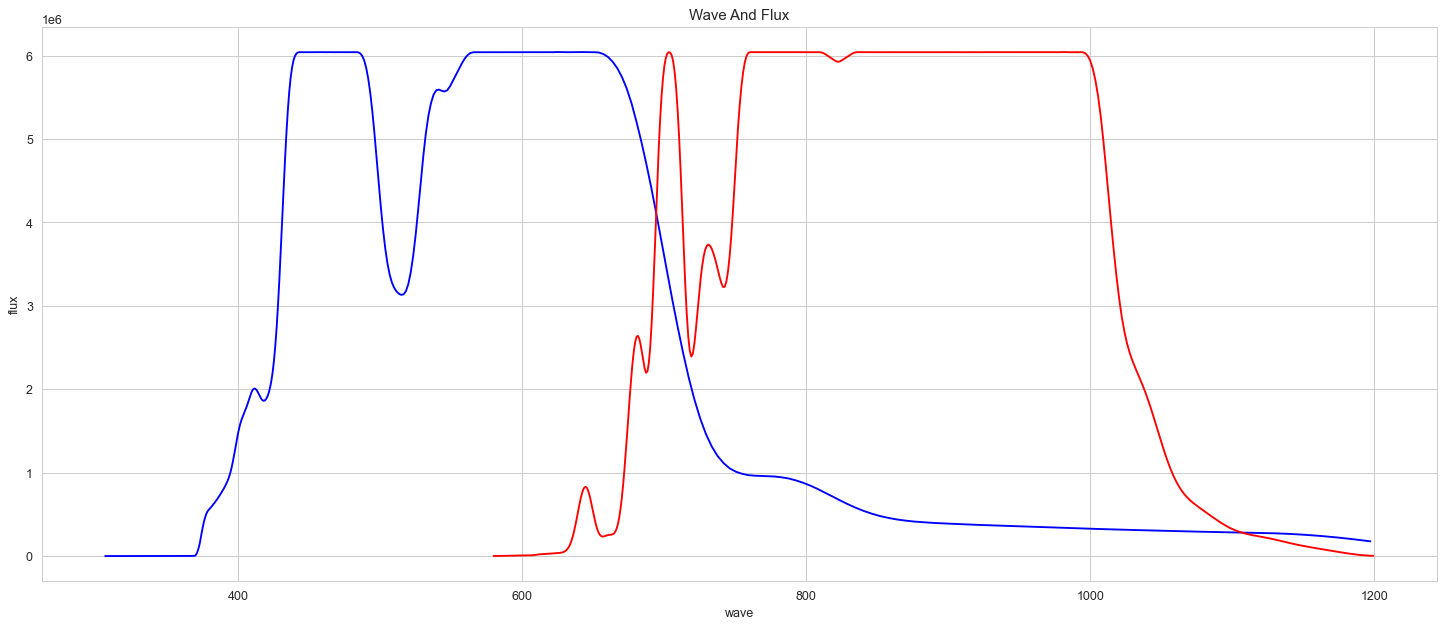

In [3]:
fig, ax = plt.subplots(figsize=(20, 8), dpi=90)
# plt.xticks(rotation=90)
#plt.figure(figsize=(20,8))
sns.lineplot(data=df_data_blue, x="wave", y="flux", errorbar=None,  color="blue")
sns.lineplot(data=df_data_red, x="wave", y="flux", errorbar=None,  color="red")
#plt.xlim(0,100000) #Definir el rango donde queramos mostrar eje X
# ax.xaxis.set_major_locator(ticker.MultipleLocator(1000000))
plt.title('Wave And Flux')

In [4]:







































df_data_blue.head()  # first 5 entries

,wave,flux
34,1197.187859,176464.775885
35,1185.280920,201547.661135
36,1173.612564,223087.096038
37,1162.176080,240915.865865
38,1150.965006,255006.535540


In [5]:
df_data_blue.tail()  # last 5 entries

,wave,flux
473,307.497130,-1.808550
474,307.183757,1.226901
475,306.871524,2.376504
476,306.560424,1.693967
477,306.250451,2.329319


In [6]:
df_data_blue.info()  # información sobre las filas y columnas y tipos de datos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444 entries, 34 to 477
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   wave    444 non-null    float64
 1   flux    444 non-null    float64
dtypes: float64(2)
memory usage: 10.4 KB


In [7]:
df_data_blue.corr()  #Correlacion entre columnas

,wave,flux
wave,1.000000,0.136314
flux,0.136314,1.000000


In [8]:
df_data_blue.describe()  # infos estadisticas de las columnas

,wave,flux
count,444.000000,4.440000e+02
mean,504.339639,2.095405e+06
std,209.601242,2.454584e+06
min,306.250451,-2.766437e+00
25%,349.311588,5.133248e+02
50%,423.762956,7.093688e+05
75%,588.919266,5.055215e+06
max,1197.187859,6.043034e+06


In [9]:
wave = df_data_blue['wave']
flux = df_data_blue['flux']

<AxesSubplot:title={'center':'Flux and Wave'}>

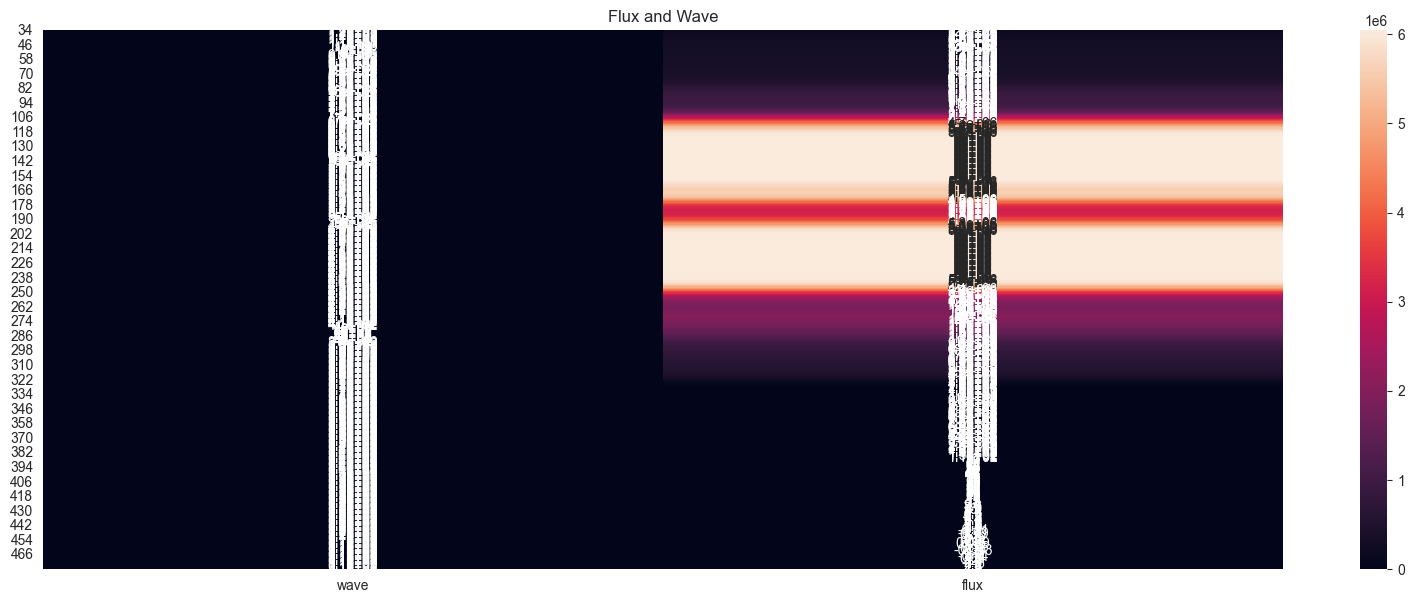

In [10]:
# Set the width and height of the figure
plt.figure(figsize=(20, 7))

# Add title
plt.title("Flux and Wave")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=df_data_blue, annot=True)

In [ ]:
# Correlation of the columns shown in a heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True);

<AxesSubplot:xlabel='flux', ylabel='wave'>

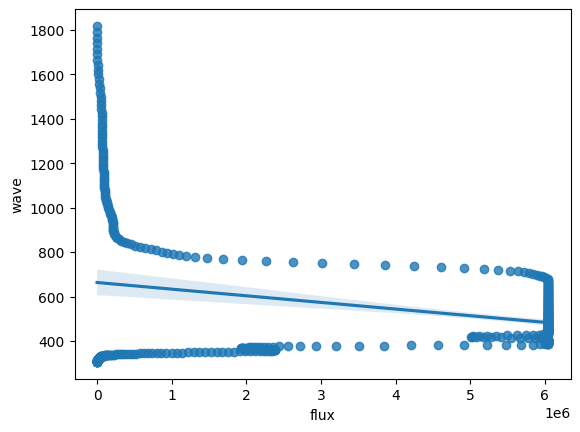

In [118]:
#sns.scatterplot(x=df_data['Flux'], y=df_data['Wave'])
sns.regplot(x=df_data_blue['flux'], y=df_data_blue['wave'])

C:\Users\Danie\AppData\Local\Temp\ipykernel_30456\3429895664.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<AxesSubplot:xlabel='flux', ylabel='Density'>

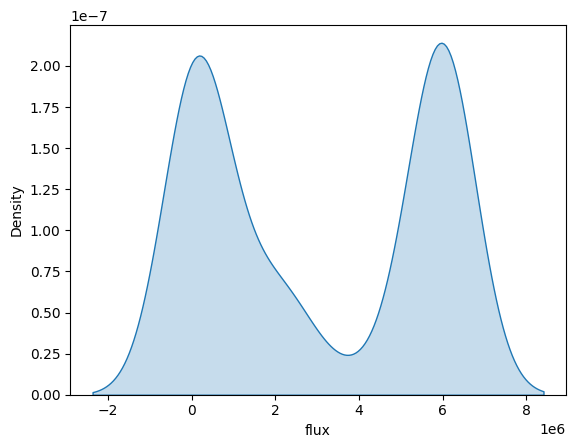

In [119]:
# KDE plot ( Grafico de densidad histograma suavizado)
sns.kdeplot(data=df_data_blue['flux'], shade=True)

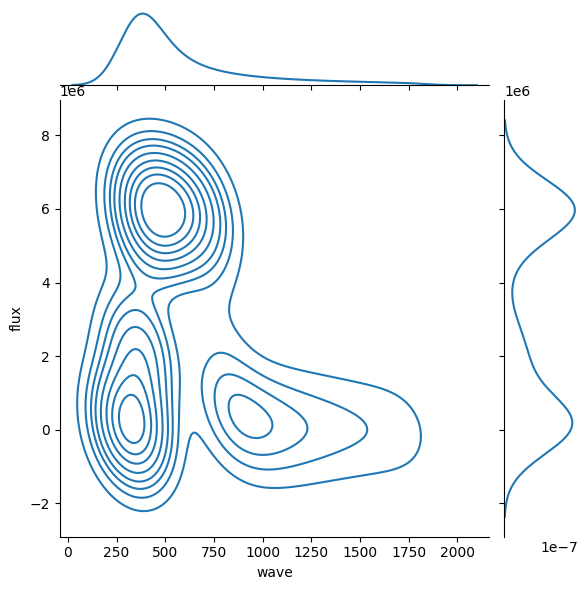

In [120]:
# 2D KDE plot 
# El código de colores nos muestra qué tan probable es que veamos diferentes combinaciones de ancho de sépalo y largo de pétalo, 
# donde las partes más oscuras de la figura son más probables.
sns.jointplot(x=df_data_blue['wave'], y=df_data_blue['flux'], kind="kde")

C:\Users\orest\AppData\Local\Temp\ipykernel_36128\4140257976.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_data_blue.wave, shade=True, ax=axs[0])
C:\Users\orest\AppData\Local\Temp\ipykernel_36128\4140257976.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_data_blue.flux, shade=True, ax=axs[1]);


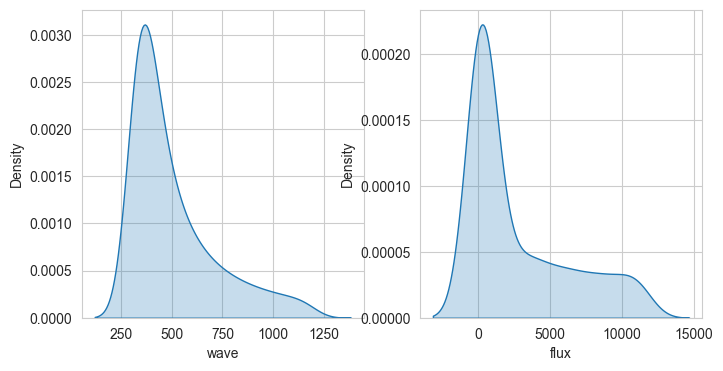

In [28]:
#Comportamiento de las dos variables
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
sns.kdeplot(df_data_blue.wave, shade=True, ax=axs[0])
sns.kdeplot(df_data_blue.flux, shade=True, ax=axs[1]);

C:\Users\orest\AppData\Local\Temp\ipykernel_36128\4038477844.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_data_red.wave, shade=True, ax=axs[0])
C:\Users\orest\AppData\Local\Temp\ipykernel_36128\4038477844.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_data_red.flux, shade=True, ax=axs[1]);


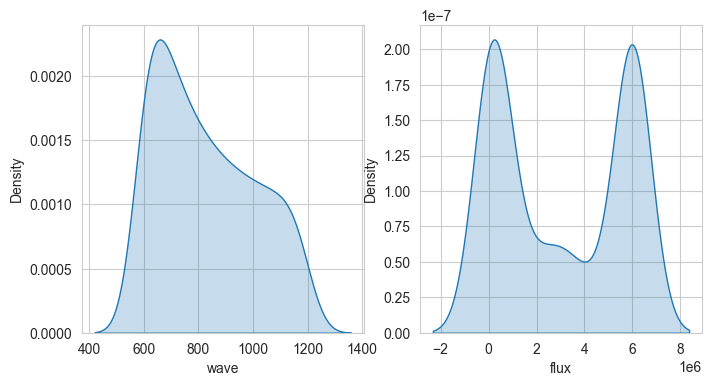

In [29]:
#Comportamiento de las dos variables
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
sns.kdeplot(df_data_red.wave, shade=True, ax=axs[0])
sns.kdeplot(df_data_red.flux, shade=True, ax=axs[1]);